In [2]:
import json

with open('/content/fexEx.json', 'r') as f:
    data = json.load(f)

print(data)

[{'task_id': 'HumanEval/1', 'prompt': 'from typing import List\n\n\ndef separate_paren_groups(paren_string: str) -> List[str]:\n    """ Input to this function is a string containing multiple groups of nested parentheses. Your goal is to\n    separate those group into separate strings and return the list of those.\n    Separate groups are balanced (each open brace is properly closed) and not nested within each other\n    Ignore any spaces in the input string.\n    >>> separate_paren_groups(\'( ) (( )) (( )( ))\')\n    [\'()\', \'(())\', \'(()())\']\n    """\n', 'entry_point': 'separate_paren_groups', 'canonical_solution': "    result = []\n    current_string = []\n    current_depth = 0\n\n    for c in paren_string:\n        if c == '(':\n            current_depth += 1\n            current_string.append(c)\n        elif c == ')':\n            current_depth -= 1\n            current_string.append(c)\n\n            if current_depth == 0:\n                result.append(''.join(current_strin

In [3]:
!pip install -q groq
from groq import Groq
from google.colab import userdata
gr = userdata.get('groq')
client = Groq(api_key=gr)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 3.9 MB/s eta 0:00:00


In [4]:
def run_tests(candidate_function):
    """
    Correctly runs the HumanEval test string against a candidate function.
    """
    test_string = data[3]['test']
    # This scope will hold the functions defined in the test_string
    exec_scope = {}

    try:
        # 1. Execute the test string. This defines the 'check' function
        #    within exec_scope.
        exec(test_string, {}, exec_scope)

        # 2. Retrieve the 'check' function from the scope
        check_function = exec_scope['check']

        # 3. Now, CALL the 'check' function with our candidate.
        #    This is where the asserts are actually run.
        check_function(candidate_function)

        print("✅ All test cases passed!")

    except AssertionError as e:
        # This will catch failures from the assert statements inside 'check'
        print(f"❌ Test case failed: {e}")
    except Exception as e:
        print(f"💥 An error occurred during testing: {e}")

#Qwen

##Qwen COT

In [5]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="qwen/qwen3-32b",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given coding problem step by step.

Follow this exact output structure:

**APPROACH:**
1.  **Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
2.  **Analyze the examples:** (Break down the provided examples to understand edge cases).
3.  **Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
4.  **Implement the solutions:** (Write the code for the three algorithms).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[3]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    reasoning_effort="none",
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**APPROACH:**

1. **Understand the requirements:**  
   The task is to compute the Mean Absolute Deviation (MAD) of a given list of floating point numbers. The MAD is the average of the absolute differences between each number in the list and the mean of the list.  
   Input: A list of floating point numbers.  
   Output: A single float representing the MAD of the input dataset.  
   The mean is calculated as the sum of all numbers divided by the number of elements, and then we take the absolute differences between each data point and the mean, sum them, and divide by the count of numbers to get the MAD.

2. **Analyze the example:**
   Example input: `[1.0, 2.0, 3.0, 4.0]`
   - Mean is `(1 + 2 + 3 + 4) / 4 = 10 / 4 = 2.5`
   - Absolute differences are `|1 - 2.5| = 1.5`, `|2 - 2.5| = 0.5`, `|3 - 2.5| = 0.5`, `|4 - 2.5| = 1.5`
   - MAD = `(1.5 + 0.5 + 0.5 + 1.5) / 4 = 4 / 4 = 1.0`
   - So the output for the input is `1.0`, which is correct.

3. **Plan the algorithms:**

   - **Approach 1

Code 1

In [7]:
from typing import List

def test1(numbers: List[float]) -> float:
    if not numbers:
        raise ValueError("Input list must not be empty.")

    mean = sum(numbers) / len(numbers)
    total_deviation = 0.0
    for num in numbers:
        total_deviation += abs(num - mean)
    return total_deviation / len(numbers)

In [8]:
run_tests(test1)

✅ All test cases passed!


Code 2

In [9]:
def test2(numbers: List[float]) -> float:
    if not numbers:
        raise ValueError("Input list must not be empty.")

    mean = sum(numbers) / len(numbers)
    return sum(abs(num - mean) for num in numbers) / len(numbers)

In [10]:
run_tests(test2)

✅ All test cases passed!


Code 3

In [13]:
import statistics

def test3(numbers: List[float]) -> float:
    if not numbers:
        raise ValueError("Input list must not be empty.")

    mean = statistics.mean(numbers)
    return statistics.fmean(abs(x - mean) for x in numbers)

In [14]:
run_tests(test3)

✅ All test cases passed!


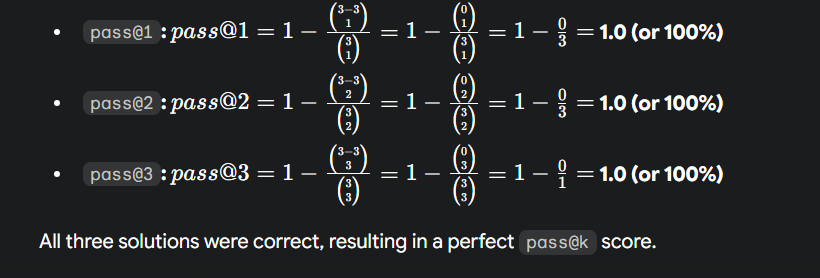

Qwen on Stepwise COT

In [15]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="qwen/qwen3-32b",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given problem systematically.

Follow this exact output structure:

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
* **Step 2: Analyze the examples:** (Break down the docstring examples to find edge cases).
* **Step 3: Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
* **Step 4: Implement the solutions:** (Provide the final code for all three algorithms below).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[3]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    reasoning_effort="none",
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** 
  The function needs to compute the Mean Absolute Deviation (MAD) for a list of floating-point numbers. The MAD is calculated as the average of the absolute differences between each number and the mean of the dataset. The function is given a list and must return a float with the MAD value.

* **Step 2: Analyze the examples:** 
  For the example `mean_absolute_deviation([1.0, 2.0, 3.0, 4.0])`, the mean is `2.5`. The absolute differences are `[1.5, 0.5, 0.5, 1.5]`, averaging to `1.0`. This demonstrates a basic case.

  We need to ensure that:
  - The function works with any list of floats.
  - We avoid potential division by zero if the input is an empty list.
  - All absolute differences are correctly calculated and averaged.

* **Step 3: Plan the algorithms:** 
  1. **Standard approach with `statistics.mean`:** Use Python's built-in `statistics.mean()` to compute the mean, then calculate the absolute differences and av

In [16]:
from statistics import mean
from typing import List

def test1(numbers: List[float]) -> float:
    mean_val = mean(numbers)
    abs_diffs = [abs(x - mean_val) for x in numbers]
    mad = mean(abs_diffs)
    return mad

In [17]:
run_tests(test1)

✅ All test cases passed!


In [18]:
def test2(numbers: List[float]) -> float:
    mean_val = sum(numbers) / len(numbers)
    abs_diffs = [abs(x - mean_val) for x in numbers]
    mad = sum(abs_diffs) / len(abs_diffs)
    return mad

In [19]:
run_tests(test2)

✅ All test cases passed!


In [20]:
def test3(numbers: List[float]) -> float:
    mean_val = sum(numbers) / len(numbers)
    mad = sum(abs(x - mean_val) for x in numbers) / len(numbers)
    return mad

In [21]:
run_tests(test3)

✅ All test cases passed!


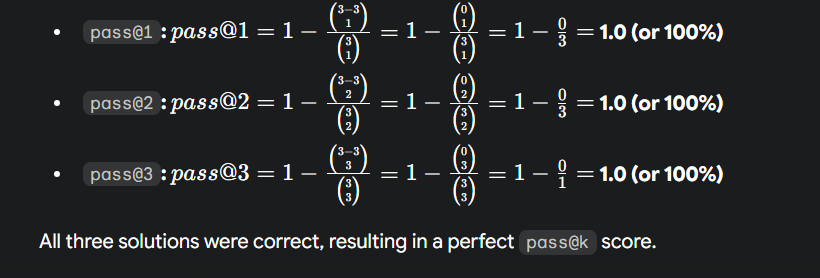

#Llama

##Llama COT

In [22]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given coding problem step by step.

Follow this exact output structure:

**APPROACH:**
1.  **Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
2.  **Analyze the examples:** (Break down the provided examples to understand edge cases).
3.  **Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
4.  **Implement the solutions:** (Write the code for the three algorithms).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[3]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**APPROACH:**
1.  **Understand the requirements:** 
    - We need to find the Mean Absolute Deviation of a set of numbers.
    - The Mean Absolute Deviation is the average absolute difference between each number and the mean of the dataset.
    - The mean is the average of all numbers in the dataset.
2.  **Analyze the examples:**
    - The example provided shows a list of numbers [1.0, 2.0, 3.0, 4.0] and the expected output is 1.0.
    - We can infer that the function should handle a list of numbers and return the Mean Absolute Deviation.
3.  **Plan the algorithms:**
    - **Algorithm 1:** Direct Calculation
        *   Calculate the mean of the list
        *   Calculate the absolute difference between each number and the mean
        *   Calculate the mean of the absolute differences
    - **Algorithm 2:** Using NumPy
        *   Use NumPy's mean function to calculate the mean
        *   Use NumPy's abs function to calculate the absolute differences
        *   Use NumPy's mean func

Code 1

In [23]:
import numpy as np
from typing import List

def test2(numbers: List[float]) -> float:
    # Convert the list to a NumPy array
    numbers_array = np.array(numbers)

    # Calculate the mean
    mean_value = np.mean(numbers_array)

    # Calculate the absolute differences between each number and the mean
    absolute_differences = np.abs(numbers_array - mean_value)

    # Calculate the mean of the absolute differences
    mad = np.mean(absolute_differences)

    return mad

In [24]:
run_tests(test1)

✅ All test cases passed!


Code 2

In [25]:
def test2(numbers: List[float]) -> float:
    # Convert the list to a NumPy array
    numbers_array = np.array(numbers)

    # Calculate the mean
    mean_value = np.mean(numbers_array)

    # Calculate the absolute differences between each number and the mean
    absolute_differences = np.abs(numbers_array - mean_value)

    # Calculate the mean of the absolute differences
    mad = np.mean(absolute_differences)

    return mad

In [26]:
run_tests(test2)

✅ All test cases passed!


Code 3

In [27]:
def test3(numbers: List[float]) -> float:
    # Calculate the mean
    mean_value = sum(numbers) / len(numbers)

    # Calculate the absolute differences between each number and the mean
    absolute_differences = [abs(num - mean_value) for num in numbers]

    # Calculate the mean of the absolute differences
    mad = sum(absolute_differences) / len(absolute_differences)

    return mad

In [28]:
run_tests(test3)

✅ All test cases passed!


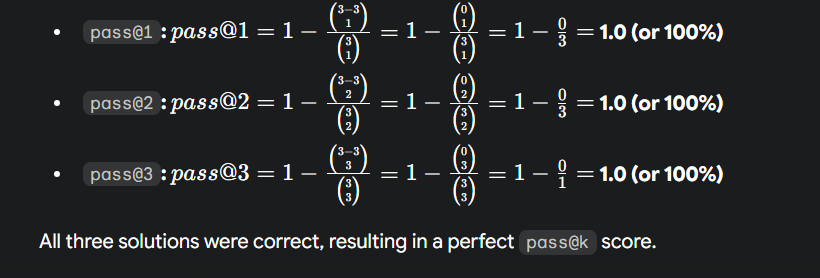

LLama on Stepwise COT

In [29]:
client = Groq(api_key=gr)
completion = client.chat.completions.create(
    model="llama-3.1-8b-instant",
    messages=[
      {
        "role": "system",
        "content": """You are an expert Python programming assistant. You must solve the given problem systematically.

Follow this exact output structure:

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** (Analyze the problem statement, inputs, outputs, and constraints).
* **Step 2: Analyze the examples:** (Break down the docstring examples to find edge cases).
* **Step 3: Plan the algorithms:** (Describe the logic for three different and distinct algorithms to solve the problem).
* **Step 4: Implement the solutions:** (Provide the final code for all three algorithms below).

**REQUIREMENTS:**
- You must provide three (3) different and distinct code solutions.
- Implement each function using the **exact signature** (parameters and return type) from the problem prompt.
- **CRITICAL: Name your three functions `test1`, `test2`, and `test3` respectively.**
- Include all necessary imports at the top of each code block.

**--- PLAN ---**
(Your detailed plan and reasoning for all three algorithms goes here.)

**--- SOLUTIONS ---**"""
      },
      {
        "role": "user",
        "content": data[3]['prompt']
      }
    ],
    temperature=1,
    max_completion_tokens=4096,
    top_p=1,
    stream=True,
    stop=None
)

for chunk in completion:
    print(chunk.choices[0].delta.content or "", end="")

**SYSTEMATIC APPROACH:**
* **Step 1: Understand the requirements:** The problem statement is about calculating the Mean Absolute Deviation (MAD) for a given list of floats. We are asked to find the average absolute difference between each element and the mean of the dataset.

* **Step 2: Analyze the examples:** The provided example shows that the function should return the MAD for a list of consecutive integers. We should also consider edge cases such as an empty list, a list with a single element, or a list with non-numeric elements.

* **Step 3: Plan the algorithms:**
 1. Calculate the mean using the numbers list.
 2. Calculate the absolute deviations by subtracting the mean from each number.
 3. Calculate the average of the absolute deviations. This average should be the Mean Absolute Deviation (MAD).
 
 **However, here are three approaches to do the above steps**:
 
 1. Using a for loop to find the sum of the absolute deviations before dividing to find the average.
 2. Using numpy'

In [30]:
from typing import List
import statistics

def test1(numbers: List[float]) -> float:
    if not numbers:  # Edge case: An empty list
        return 0.0

    numbers_mean = statistics.mean(numbers)
    absolute_deviations = [abs(num - numbers_mean) for num in numbers]

    return sum(absolute_deviations) / len(absolute_deviations)

In [31]:
run_tests(test1)

✅ All test cases passed!


In [32]:
import numpy as np
from typing import List

def test2(numbers: List[float]) -> float:
    if not numbers:  # Edge case: An empty list
        return 0.0

    array = np.array(numbers)
    numbers_mean = np.mean(array)
    absolute_deviations = np.abs(array - numbers_mean)
    return np.mean(absolute_deviations)

In [33]:
run_tests(test2)

✅ All test cases passed!


In [34]:
from typing import List

def test3(numbers: List[float]) -> float:
    if not numbers:  # Edge case: An empty list
        return 0.0

    numbers_mean = sum(numbers) / len(numbers)
    absolute_deviations = [abs(num - numbers_mean) for num in numbers]

    return sum(absolute_deviations) / len(absolute_deviations)

In [35]:
run_tests(test3)

✅ All test cases passed!


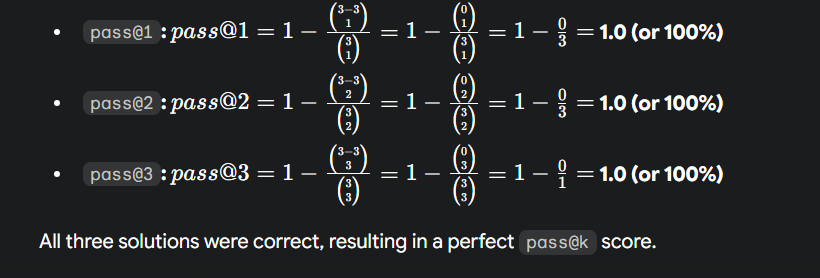